In [198]:
import numpy as np
import pandas as pd

In [199]:
import os

In [200]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [201]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [202]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,928.0,"Kelly, Mr. James",19.0,"Unknown, Ireland",Southampton,New York City,NaN,70MB,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1297.0,"Wilkes, Mrs. Ellen",47.0,"Penzance, Cornwall, England",Southampton,"Akron, Ohio, US",16,NaN,3.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,518.0,"Myles, Mr. Thomas Francis",63.0,"Fermoy, Ireland[note 1]",Queenstown,"Waban, Massachusetts, US",NaN,NaN,2.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1303.0,"Wirz, Mr. Albert",27.0,"Uster, Switzerland",Southampton,"Beloit, Wisconsin, US",NaN,131MB,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,871.0,"Hirvonen, Mrs. Helga Elisabeth (née Lindqvist)",22.0,"Taalintehdas, Finland",Southampton,"Monessen, Pennsylvania, US",15,NaN,3.0


# Pandas Profilling

In [203]:
#!pip install -U pandas-profiling

In [204]:
from pandas_profiling import ProfileReport

if not os.path.exists("titainic_train.html"):
    prof = ProfileReport(train_df)
    prof.to_file(output_file='titainic_train.html')
else:
    print("The file is already present.")

The file is already present.


In [205]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

In [206]:
# Missing percentage in a column
(train_df.isnull().sum()/train_df.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
WikiId          0.224467
Name_wiki       0.224467
Age_wiki        0.448934
Hometown        0.224467
Boarded         0.224467
Destination     0.224467
Lifeboat       61.279461
Body           90.235690
Class           0.224467
dtype: float64

# Handling outliars

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

In [209]:
train_df['Age'].dtype == 'object'

False

In [210]:
columns = train_df.columns.tolist()
num_cols = []
for x in columns:
    if train_df[x].dtype != 'object':
        num_cols.append(x)
num_cols

['PassengerId',
 'Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'WikiId',
 'Age_wiki',
 'Class']

In [211]:
import scipy.stats as stats

G:\anaconda_file\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\anaconda_file\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\anaconda_file\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

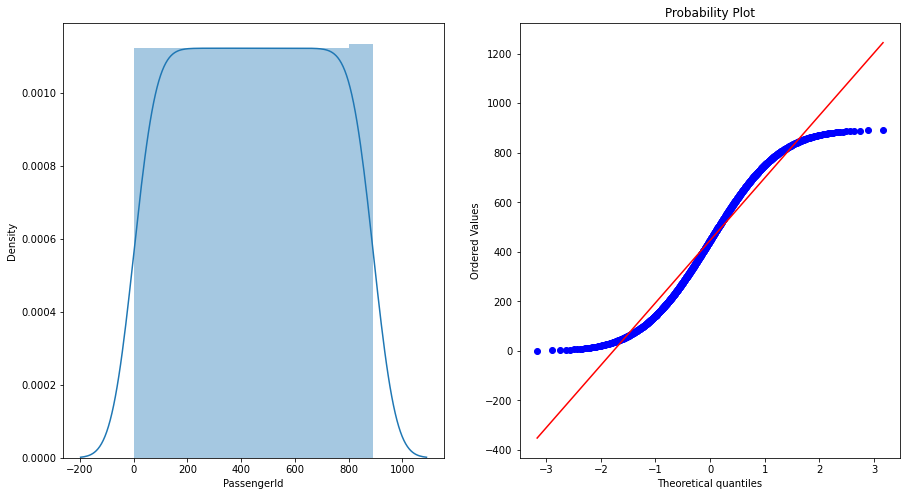

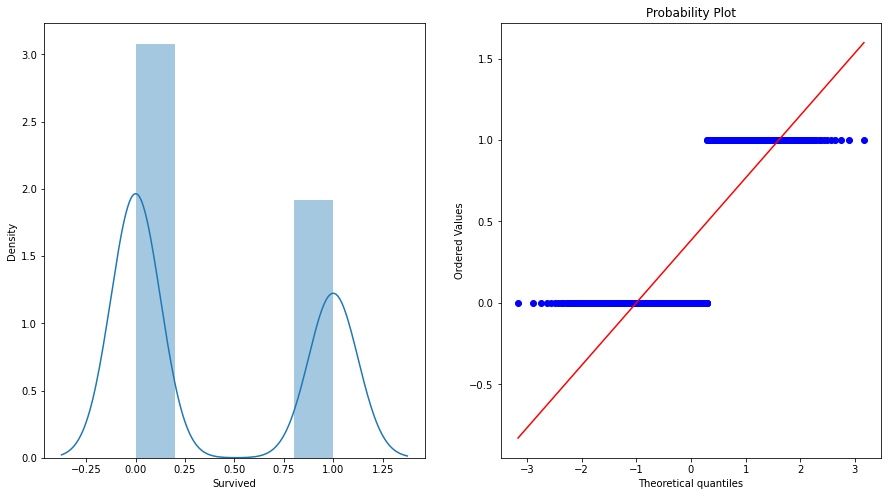

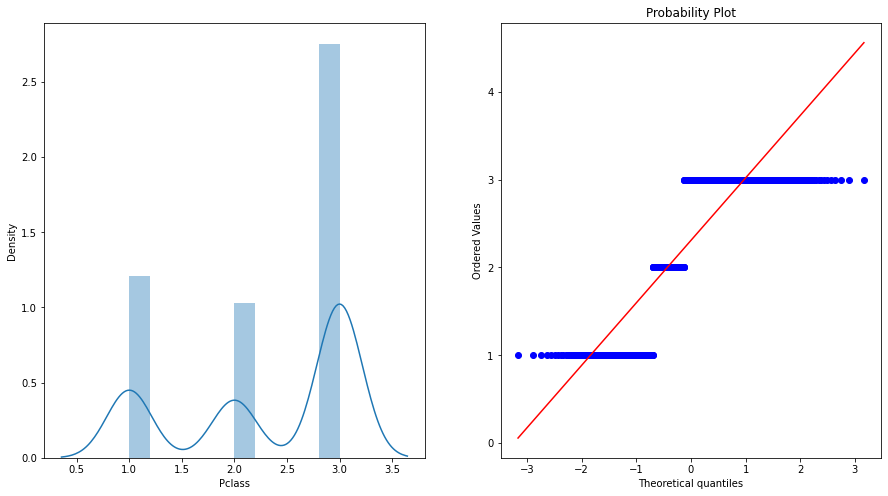

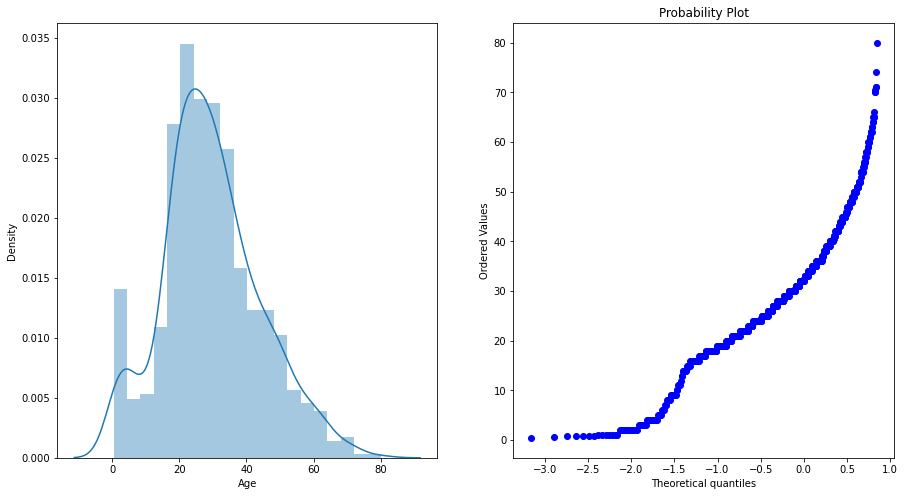

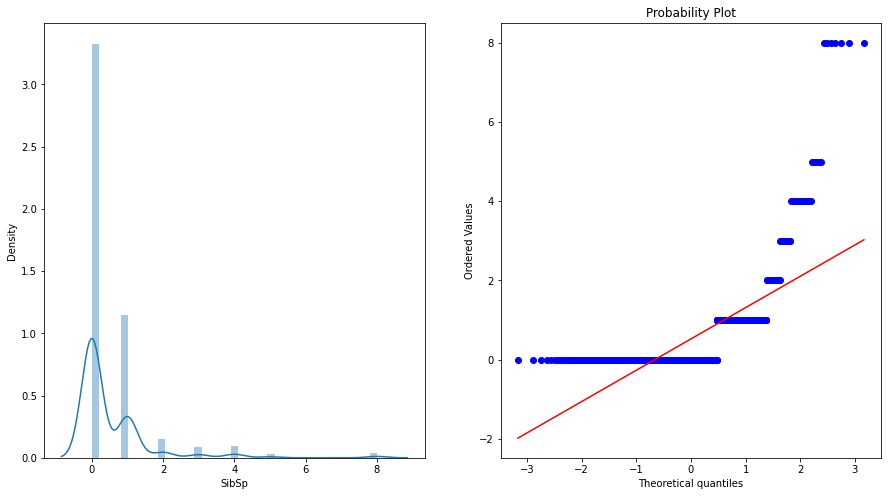

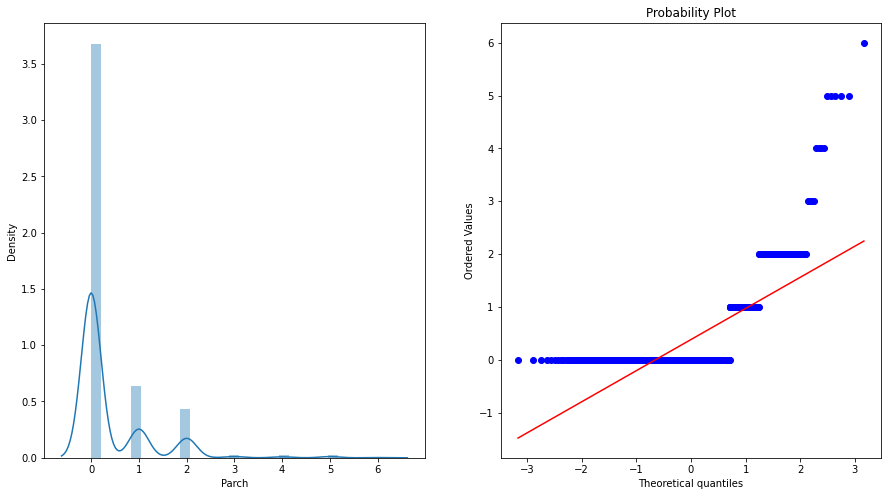

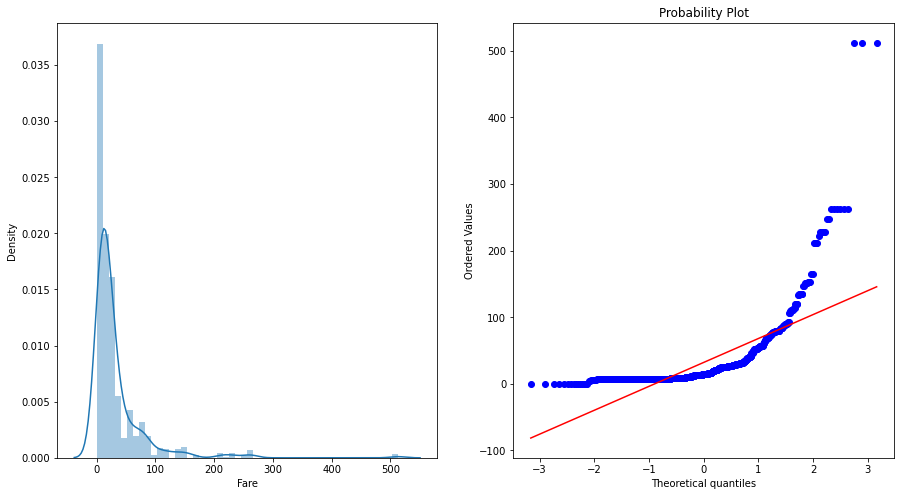

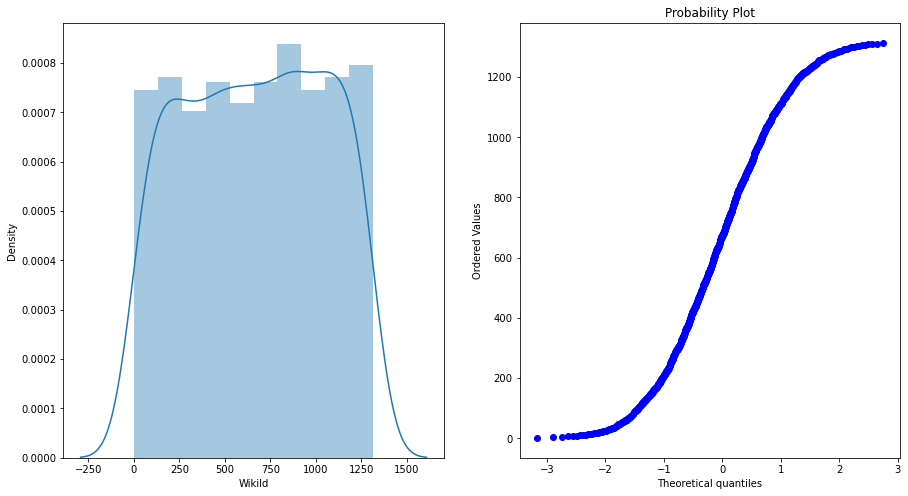

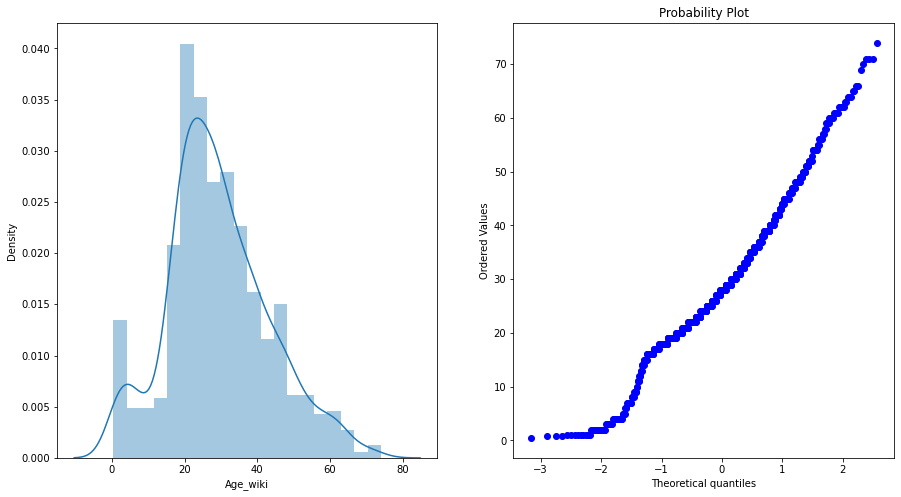

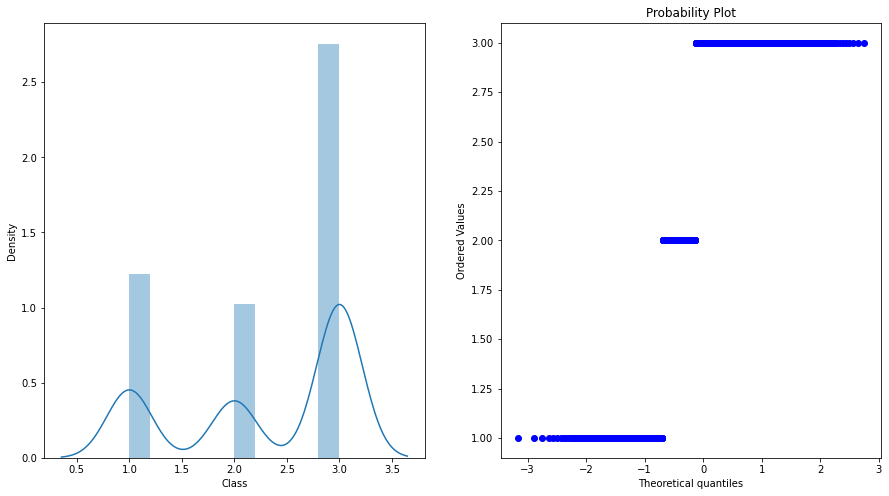

In [212]:
# check how normal distribution of this data is
for col in num_cols:
    plt.figure(figsize=(15,8))
    plt.subplot(121)
    sns.distplot(train_df[col])
    
    plt.subplot(122)
    stats.probplot(train_df[col], plot=plt)

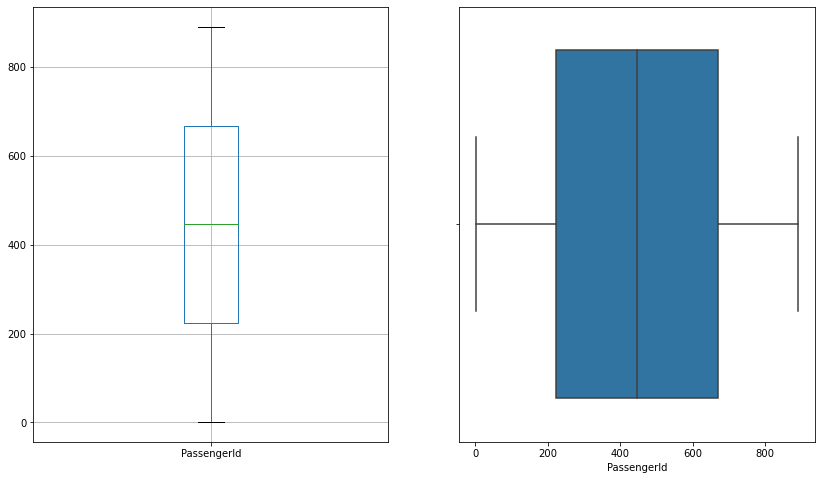

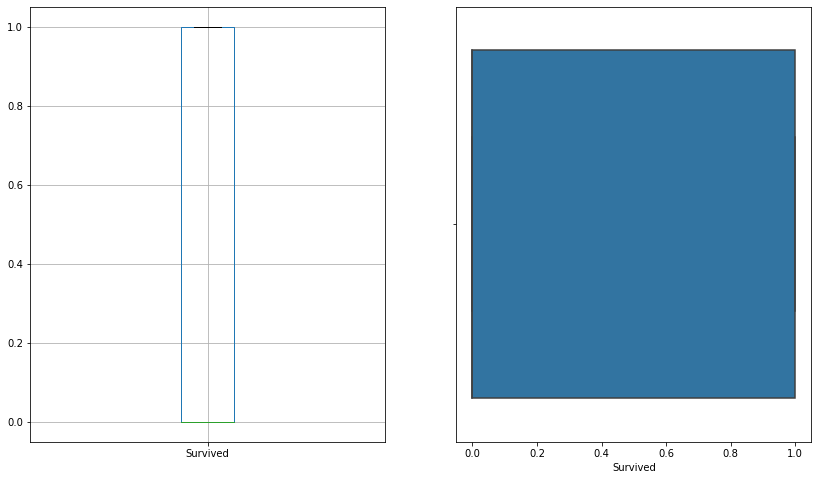

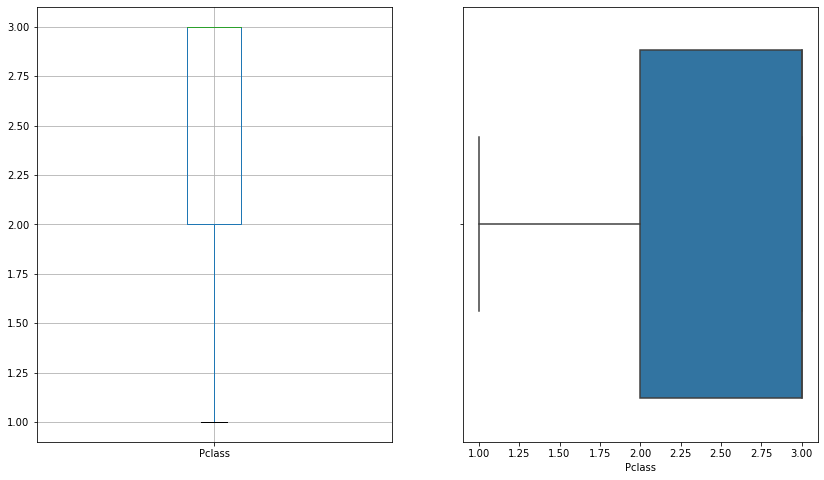

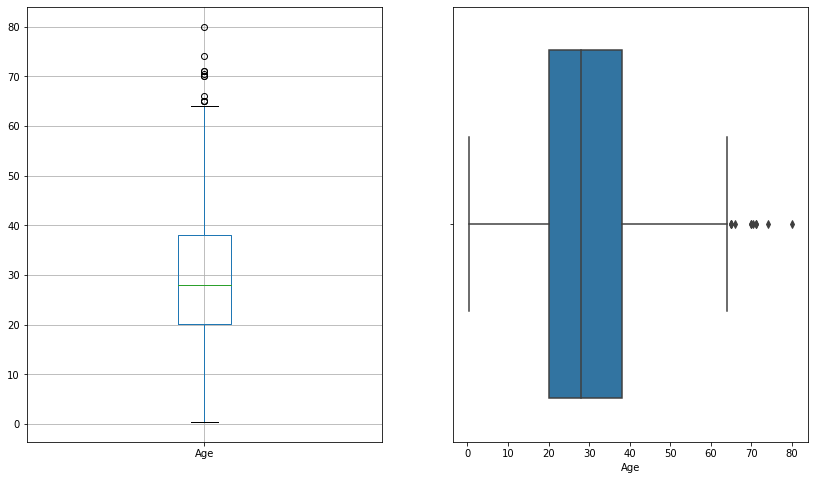

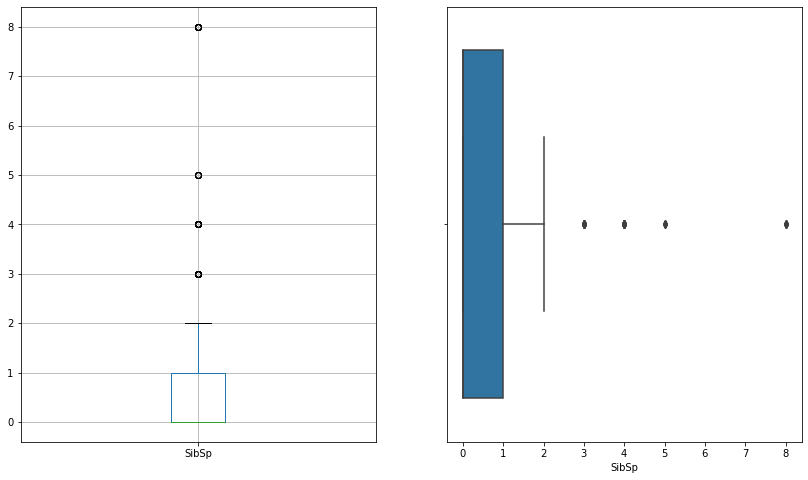

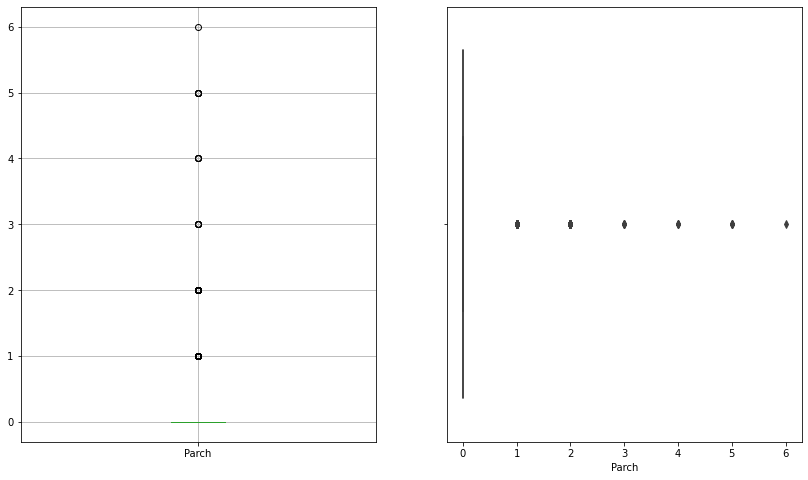

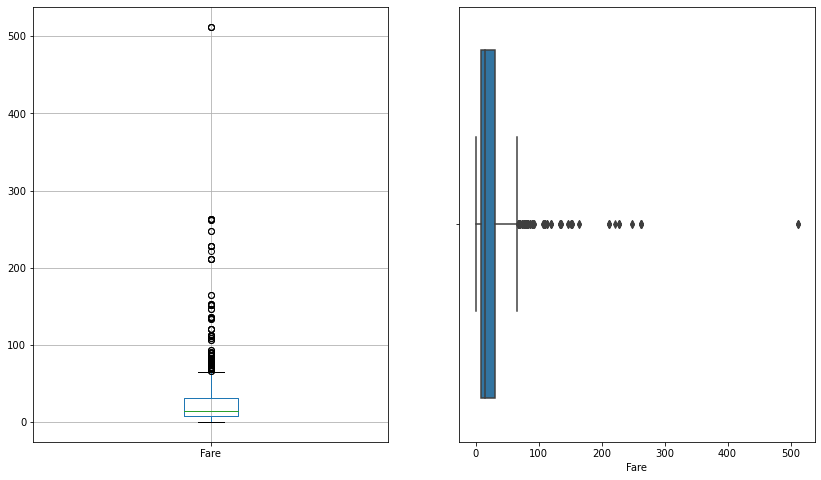

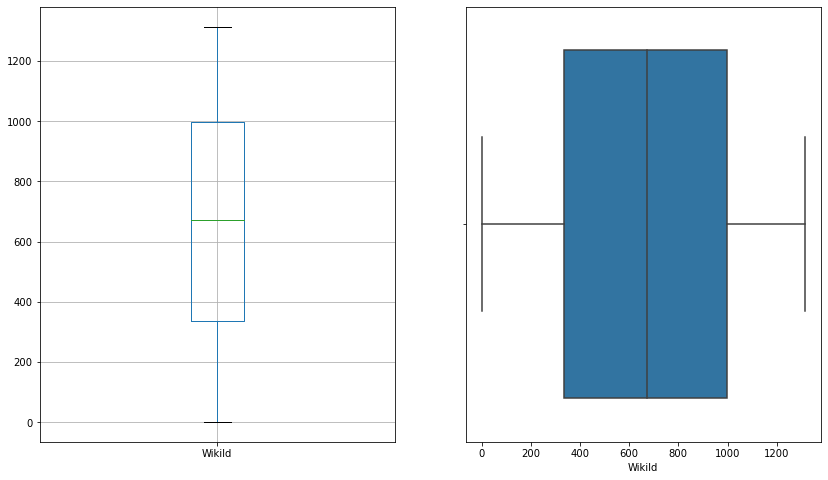

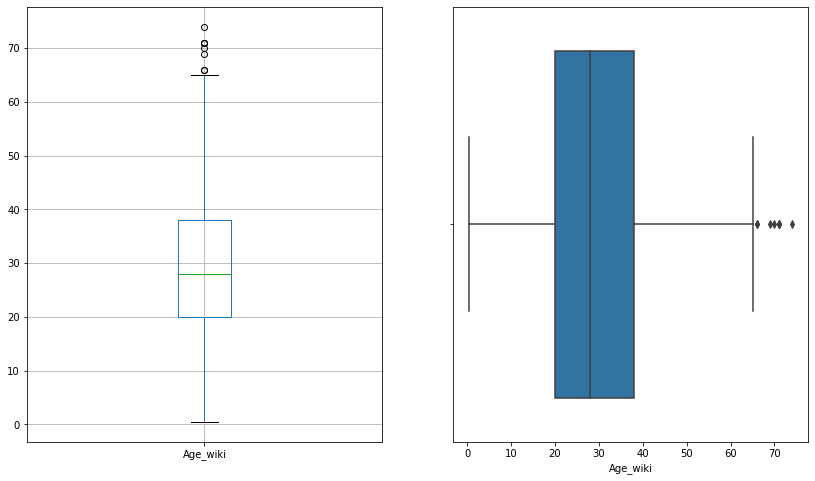

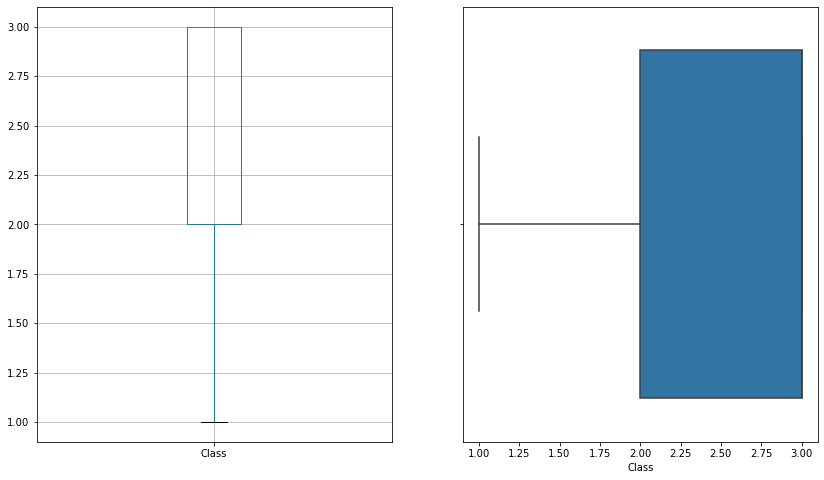

In [213]:
for col in num_cols:
    plt.figure(figsize=(14,8))
    plt.subplot(121)
    train_df.boxplot(column=col)
    plt.subplot(122)
    sns.boxplot(x=train_df[col])

# Select helpful columns and handle missing data

In [214]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

In [215]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [216]:
train_df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [217]:
train_df['Survived'] = train_df['Survived'].astype(int)

In [218]:
titanic = train_df.copy()

In [219]:
titanic.duplicated().any()

False

In [220]:
titanic.drop(columns=['PassengerId', 'Pclass', 'Name', 'Age', 'Ticket', 'WikiId', 'Name_wiki', 'Hometown', 'Lifeboat', 'Body'], inplace=True)
titanic.head()

,Survived,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age_wiki,Boarded,Destination,Class
0,0,male,1,0,7.2500,NaN,S,22.0,Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",3.0
1,1,female,1,0,71.2833,C85,C,35.0,Cherbourg,"New York, New York, US",1.0
2,1,female,0,0,7.9250,NaN,S,26.0,Southampton,New York City,3.0
3,1,female,1,0,53.1000,C123,S,35.0,Southampton,"Scituate, Massachusetts, US",1.0
4,0,male,0,0,8.0500,NaN,S,35.0,Southampton,New York City,3.0


In [221]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from sklearn import set_config
set_config(display='diagram')

In [222]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [223]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int32  
 1   Sex          891 non-null    object 
 2   SibSp        891 non-null    int64  
 3   Parch        891 non-null    int64  
 4   Fare         891 non-null    float64
 5   Cabin        204 non-null    object 
 6   Embarked     889 non-null    object 
 7   Age_wiki     887 non-null    float64
 8   Boarded      889 non-null    object 
 9   Destination  889 non-null    object 
 10  Class        889 non-null    float64
dtypes: float64(3), int32(1), int64(2), object(5)
memory usage: 73.2+ KB


In [224]:
# in first pipeline Cabin will be dropped
titanic['Cabin'].isna().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [225]:
titanic1 = titanic.drop(columns=['Cabin','Destination', 'Boarded']).copy()
titanic1.head()

,Survived,Sex,SibSp,Parch,Fare,Embarked,Age_wiki,Class
0,0,male,1,0,7.2500,S,22.0,3.0
1,1,female,1,0,71.2833,C,35.0,1.0
2,1,female,0,0,7.9250,S,26.0,3.0
3,1,female,1,0,53.1000,S,35.0,1.0
4,0,male,0,0,8.0500,S,35.0,3.0


In [226]:
titanic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int32  
 1   Sex       891 non-null    object 
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Embarked  889 non-null    object 
 6   Age_wiki  887 non-null    float64
 7   Class     889 non-null    float64
dtypes: float64(3), int32(1), int64(2), object(2)
memory usage: 52.3+ KB


In [227]:
X = titanic1.drop(columns=['Survived']).copy()
y = titanic1['Survived']

In [228]:
X.head()

,Sex,SibSp,Parch,Fare,Embarked,Age_wiki,Class
0,male,1,0,7.2500,S,22.0,3.0
1,female,1,0,71.2833,C,35.0,1.0
2,female,0,0,7.9250,S,26.0,3.0
3,female,1,0,53.1000,S,35.0,1.0
4,male,0,0,8.0500,S,35.0,3.0


In [229]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
X_train.shape, y_train.shape

((712, 7), (712,))

In [230]:
imputer = ColumnTransformer([
    ('impute_age', SimpleImputer(), [5]),
    ('impute_embark', SimpleImputer(strategy='most_frequent'), [4])
], remainder='passthrough')

In [231]:
encoding = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), [0,4])
])

In [232]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()
nb = GaussianNB()

In [233]:
type(lr).__name__

'LogisticRegression'

# Logistic Regression

In [234]:
lr_pipe1 = Pipeline([
    ('imputer', imputer),
    ('encoding', encoding),
    ('lr', lr)
])

In [235]:
lr_pipe1.fit(X_train, y_train)

Pipeline(steps=[('imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [5]),
                                                 ('impute_embark',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [4])])),
                ('encoding',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 4])])),
                ('lr', LogisticRegression())])

In [236]:
y_pred = lr_pipe1.predict(X_test)

In [237]:
accuracy_score(y_pred, y_test)

0.553072625698324

In [238]:
np.mean(cross_val_score(lr_pipe1, X,y, cv=10))

0.6138951310861422

# Decision Tree

In [239]:
dt_pipe1 = Pipeline([
    ('imputer', imputer),
    ('encoding', encoding),
    ('dt', dt)
])

In [240]:
dt_pipe1.fit(X_train, y_train)

Pipeline(steps=[('imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [5]),
                                                 ('impute_embark',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [4])])),
                ('encoding',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 4])])),
                ('dt', DecisionTreeClassifier())])

In [241]:
y_pred_dt = dt_pipe1.predict(X_test)
y_pred_dt

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1])

In [242]:
accuracy_score(y_pred_dt, y_test)

0.553072625698324

In [243]:
np.mean(cross_val_score(dt_pipe1, X, y, cv=10))

0.5959300873907616

## loop through the whole process

In [244]:
import time

In [245]:
models = [LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), 
          SVC(), GaussianNB()]

# def output(X,y,models):
    
#     X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
#     Name = []
#     Accuracy = []
#     Time_taken = []
#     for model in models:
#         Name.append(type(model).__name__)
#         mod = model
#         pipe = Pipeline([
#     ('imputer', imputer),
#     ('encoding', encoding),
#     ('model', mod)
# ])
        
#         begin = time.time()
#         pipe.fit(X_train, y_train)
#         prediction = pipe.predict(X_test)
#         end = time.time()
#         acc_scr = accuracy_score(prediction,y_test)
#         Accuracy.append(acc_scr)
#         Time_taken.append(end-begin)
        
#     output = {'Name': Name, 'Accuracy': Accuracy, 'Time taken': Time_taken}
#     output = pd.DataFrame(output)
    
#     return output
        

In [246]:
preprocessor = Pipeline([
    ('imputer', imputer),
    ('encoding', encoding),
])

In [247]:
def output(X,y,models, preprocessor):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
    Name = []
    Accuracy = []
    Time_taken = []
    cross_v_scr = []
    for model in models:
        Name.append(type(model).__name__)
        mod = model
        pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', mod)
])
        
        begin = time.time()
        pipe.fit(X_train, y_train)
        prediction = pipe.predict(X_test)
        end = time.time()
        Time_taken.append(end-begin)
        acc_scr = np.round(accuracy_score(prediction,y_test),2)
        Accuracy.append(acc_scr)
        
        cvs = np.round(np.mean(cross_val_score(pipe, X, y, cv=10)),2)
        cross_v_scr.append(cvs)
        
    output = {'Name': Name, 'Accuracy': Accuracy, 'CrossValScr': cross_v_scr, 'Time taken': Time_taken}
    output = pd.DataFrame(output)
    return output.sort_values(by=['CrossValScr'], ascending=False)

In [248]:
# here for preprocessing steps ive used only simple imputer and one hot encoding
output(X, y, models, preprocessor)

,Name,Accuracy,CrossValScr,Time taken
0,LogisticRegression,0.55,0.61,0.027996
3,SVC,0.57,0.60,0.060997
1,DecisionTreeClassifier,0.55,0.59,0.021003
2,KNeighborsClassifier,0.59,0.58,0.024995
4,GaussianNB,0.46,0.40,0.016000


## Now lets check which preprocessing steps are working best

In [249]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int32  
 1   Sex          891 non-null    object 
 2   SibSp        891 non-null    int64  
 3   Parch        891 non-null    int64  
 4   Fare         891 non-null    float64
 5   Cabin        204 non-null    object 
 6   Embarked     889 non-null    object 
 7   Age_wiki     887 non-null    float64
 8   Boarded      889 non-null    object 
 9   Destination  889 non-null    object 
 10  Class        889 non-null    float64
dtypes: float64(3), int32(1), int64(2), object(5)
memory usage: 73.2+ KB


In [250]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   SibSp     891 non-null    int64  
 2   Parch     891 non-null    int64  
 3   Fare      891 non-null    float64
 4   Embarked  889 non-null    object 
 5   Age_wiki  887 non-null    float64
 6   Class     889 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 48.9+ KB


## new steps in preprocessing

In [251]:
# first check percentage of missing values
np.round((X.isnull().sum()/X.shape[0])*100, 2)

Sex         0.00
SibSp       0.00
Parch       0.00
Fare        0.00
Embarked    0.22
Age_wiki    0.45
Class       0.22
dtype: float64

<AxesSubplot:>

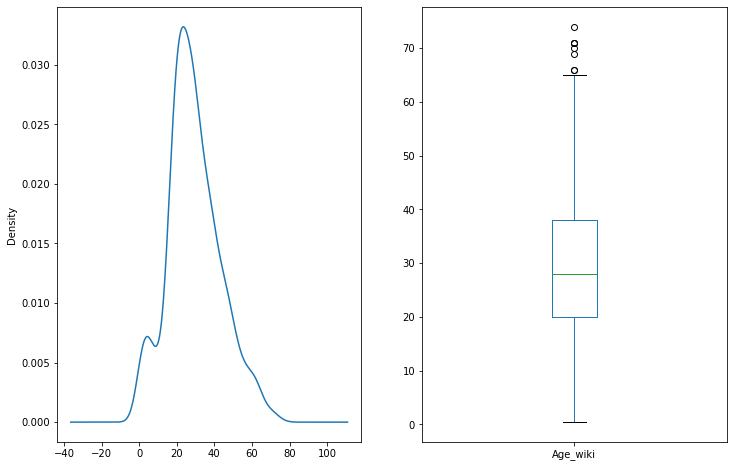

In [252]:
fig = plt.figure(figsize=(12,8))
plt.subplot(121)
X.Age_wiki.plot.kde()
plt.subplot(122)
X.Age_wiki.plot(kind='box')

In [253]:
X.Age_wiki.describe()

count    887.000000
mean      29.322063
std       13.930089
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       74.000000
Name: Age_wiki, dtype: float64

In [254]:
X.Age_wiki.value_counts()

22.00    39
19.00    36
24.00    34
28.00    32
29.00    31
         ..
70.00     1
0.83      1
74.00     1
0.92      1
0.42      1
Name: Age_wiki, Length: 74, dtype: int64

In [255]:
X['Embarked'].isna().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [256]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   SibSp     891 non-null    int64  
 2   Parch     891 non-null    int64  
 3   Fare      891 non-null    float64
 4   Embarked  889 non-null    object 
 5   Age_wiki  887 non-null    float64
 6   Class     889 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 48.9+ KB


In [257]:
categorical_features = X.select_dtypes(exclude='number').columns.tolist()
categorical_features

['Sex', 'Embarked']

In [258]:
numerical_features = X.select_dtypes(include='number').columns.tolist()
numerical_features

['SibSp', 'Parch', 'Fare', 'Age_wiki', 'Class']

In [259]:
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', MinMaxScaler())
])

In [260]:
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

In [261]:
full_preprocessor = ColumnTransformer([
    ('number', numerical_pipe, numerical_features),
    ('category', categorical_pipe, categorical_features)
])

In [262]:
output(X,y, models, preprocessor=full_preprocessor)

,Name,Accuracy,CrossValScr,Time taken
3,SVC,0.79,0.81,0.037004
0,LogisticRegression,0.79,0.80,0.037996
2,KNeighborsClassifier,0.82,0.80,0.028999
4,GaussianNB,0.78,0.79,0.022993
1,DecisionTreeClassifier,0.78,0.78,0.015003


In [263]:
another_X = X.copy()

In [264]:
another_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   SibSp     891 non-null    int64  
 2   Parch     891 non-null    int64  
 3   Fare      891 non-null    float64
 4   Embarked  889 non-null    object 
 5   Age_wiki  887 non-null    float64
 6   Class     889 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 48.9+ KB


In [265]:
another_X['Class'] = another_X['Class'].astype('object')

In [266]:
another_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   SibSp     891 non-null    int64  
 2   Parch     891 non-null    int64  
 3   Fare      891 non-null    float64
 4   Embarked  889 non-null    object 
 5   Age_wiki  887 non-null    float64
 6   Class     889 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 48.9+ KB


In [267]:
cat_features = another_X.select_dtypes(exclude='number').columns.tolist()
cat_features

['Sex', 'Embarked', 'Class']

In [268]:
num_features = another_X.select_dtypes(include='number').columns.tolist()
num_features

['SibSp', 'Parch', 'Fare', 'Age_wiki']

In [269]:
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', MinMaxScaler())
])

In [270]:
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

In [271]:
full_preprocessor = ColumnTransformer([
    ('number', numerical_pipe, numerical_features),
    ('category', categorical_pipe, categorical_features)
])

In [272]:
output(X, y, models, preprocessor=full_preprocessor)

,Name,Accuracy,CrossValScr,Time taken
3,SVC,0.79,0.81,0.036995
0,LogisticRegression,0.79,0.80,0.029001
2,KNeighborsClassifier,0.82,0.80,0.021996
4,GaussianNB,0.78,0.79,0.019004
1,DecisionTreeClassifier,0.78,0.77,0.016004
